# Measure and Visualize the Similarity between two sets of questions

In [32]:

import matplotlib.pyplot as plt
import pandas as pd

# Load the model

QUESTIONS_BANK1 = pd.read_parquet("../data/201-301-CCNA.parquet") ##CCNA
QUESTIONS_BANK2 = pd.read_parquet("../data/mmlu_Computer_Security.parquet")
#Read the questions from the questionsbank
questions_ccna = QUESTIONS_BANK1['question'].tolist()
questions_mmlu = QUESTIONS_BANK2['question'].tolist()
# Extract questions

In [16]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
model = SentenceTransformer('all-mpnet-base-v2')
# Encode questions
embeddings1 = model.encode(questions_ccna)
embeddings2 = model.encode(questions_mmlu)

cosine_similarity is:  0.23842366


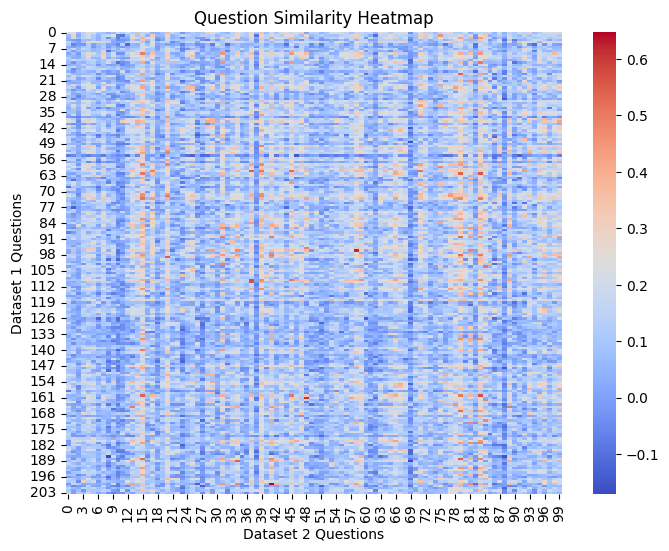

In [27]:
# Compute cosine similarity
similarities = cosine_similarity(embeddings1, embeddings2)

# Calculate the cosine similarity between the embeddings
print("cosine_similarity is: ",similarities[0][1])

# Plot the similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarities, annot=False, cmap='coolwarm')#, xticklabels=questions_mmlu, yticklabels=questions_ccna)
plt.title('Question Similarity Heatmap')
plt.xlabel('Dataset 2 Questions')
plt.ylabel('Dataset 1 Questions')
plt.show()

In [28]:
# display the top 5 questions pairs with the highest similarity
# Get the indices of the top 5 question pairs with the highest similarity
top_indices = np.unravel_index(np.argsort(similarities, axis=None)[-5:], similarities.shape)

# Display the top 5 question pairs with the highest similarity
for i in range(len(top_indices[0])):
    question_ccna = questions_ccna[top_indices[0][i]]
    question_mmlu = questions_mmlu[top_indices[1][i]]
    similarity = similarities[top_indices[0][i]][top_indices[1][i]]
    print(f"Question CCNA: {question_ccna}")
    print(f"Question MMLU: {question_mmlu}")
    print(f"Similarity: {similarity}")
    print()


Question CCNA: What is a function of Wireless LAN Controller?
Question MMLU: ___________________ began to show up few years back on wireless access points as a new way of adding or connecting new devices.
Similarity: 0.5719661712646484

Question CCNA: Which device permits or denies network traffic based on a set of rules?
Question MMLU: A packet filter firewall filters at the
Similarity: 0.5735655426979065

Question CCNA: Which technology is used to improve web traffic performance by proxy caching?
Question MMLU: What is a web proxy?
Similarity: 0.6069208383560181

Question CCNA: Which protocol uses the SSL?
Question MMLU: Encapsulating Security Payload (ESP) belongs to which Internet Security Protocol?
Similarity: 0.6197026968002319

Question CCNA: Which protocol must be implemented to support separate authorization and authentication solutions for wireless APs?
Question MMLU: When a wireless user authenticates to any AP, both of them go in the course of four-step authentication progr

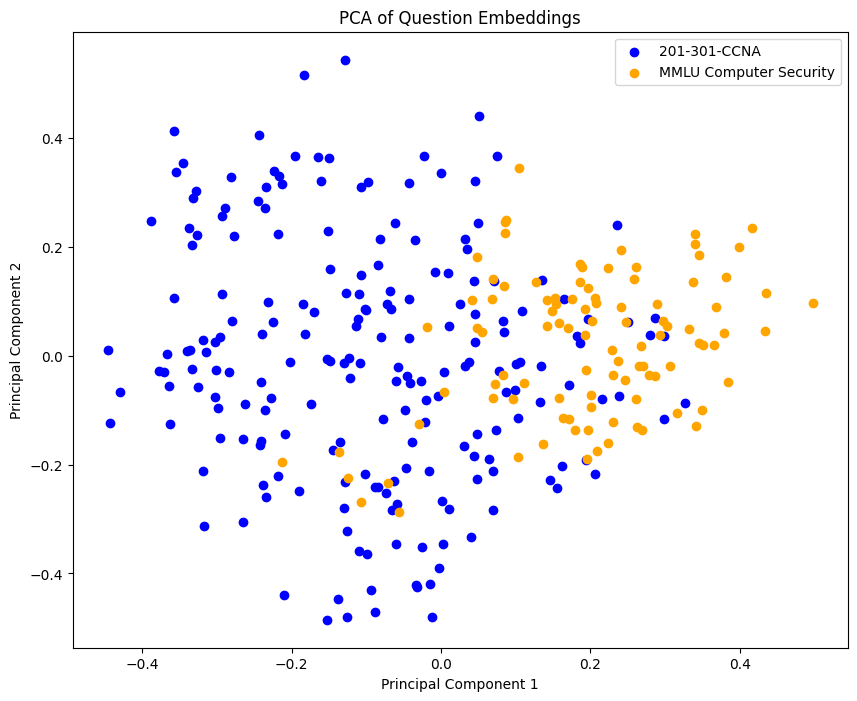

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Combine the embeddings for PCA
all_embeddings = np.vstack([embeddings1, embeddings2])

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(all_embeddings)

# Split the reduced embeddings back into the two sets
reduced_embeddings1 = reduced_embeddings[:len(embeddings1)]
reduced_embeddings2 = reduced_embeddings[len(embeddings1):]

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings1[:, 0], reduced_embeddings1[:, 1], color='blue', label='201-301-CCNA')
plt.scatter(reduced_embeddings2[:, 0], reduced_embeddings2[:, 1], color='orange', label='MMLU Computer Security')
plt.title('PCA of Question Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


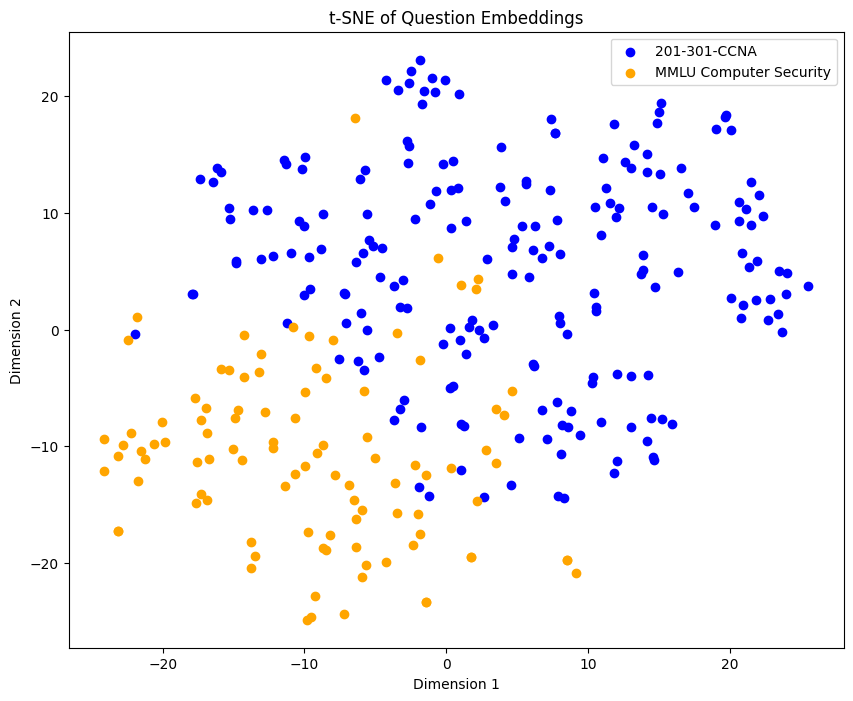

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming embeddings1 and embeddings2 are your embeddings for the two sets of questions
# Combine the embeddings for t-SNE
all_embeddings = np.vstack([embeddings1, embeddings2])

# Perform t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(all_embeddings)

# Split the reduced embeddings back into the two sets
reduced_embeddings1 = reduced_embeddings[:len(embeddings1)]
reduced_embeddings2 = reduced_embeddings[len(embeddings1):]

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings1[:, 0], reduced_embeddings1[:, 1], color='blue', label='201-301-CCNA')
plt.scatter(reduced_embeddings2[:, 0], reduced_embeddings2[:, 1], color='orange', label='MMLU Computer Security')
plt.title('t-SNE of Question Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()
